In [1]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_emotion = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_emotion.flow_from_directory(
    r'C:\Users\Dinesh\PycharmProjects\pythonProject1\emotion_data\train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale", 
    class_mode="categorical"
)

test_generator = train_data_emotion.flow_from_directory(
    r'C:\Users\Dinesh\PycharmProjects\pythonProject1\emotion_data\test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale", 
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # Update input_shape
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Conv2D(64, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Conv2D(128, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dense(7, activation='softmax'))

c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [6]:
history = emotion_model.fit(train_generator,
                    steps_per_epoch= 28709 // 64,
                    epochs = 40,
                    validation_data= test_generator,
                    validation_steps= 7178//64)

Epoch 1/40


c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 362s 790ms/step - accuracy: 0.2786 - loss: 1.7690 - val_accuracy: 0.4088 - val_loss: 1.5068
Epoch 2/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.3750 - loss: 1.5805 - val_accuracy: 0.4000 - val_loss: 1.5384
Epoch 3/40


c:\users\dinesh\appdata\local\programs\python\python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.4420 - loss: 1.4527 - val_accuracy: 0.4823 - val_loss: 1.3481
Epoch 4/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.5000 - loss: 1.2427 - val_accuracy: 0.6000 - val_loss: 1.0969
Epoch 5/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.4986 - loss: 1.3164 - val_accuracy: 0.4962 - val_loss: 1.3183
Epoch 6/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.5156 - loss: 1.3598 - val_accuracy: 0.4000 - val_loss: 1.1249
Epoch 7/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.5348 - loss: 1.2196 - val_accuracy: 0.5218 - val_loss: 1.2416
Epoch 8/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.6094 - loss: 1.1000 - val_accuracy: 0.4000 - val_loss: 1.7080
Epoch 9/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.5682 - loss: 1.1506 - val_accuracy: 0.5340 - val_loss: 1.2060
Epoch 10/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.5625 - loss: 1.2084 - val_accuracy: 

In [7]:
emotion_model.save('emotion_model_weights.h5')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
history_detect = emotion_model.history.history
history_df = pd.DataFrame(history_detect)

<function matplotlib.pyplot.show(close=None, block=None)>

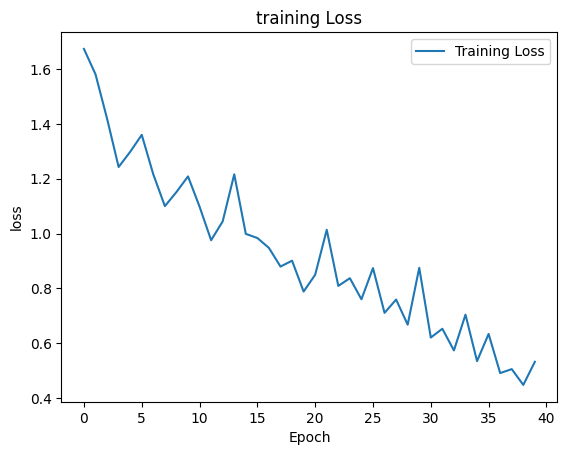

In [10]:
plt.plot(history_df['loss'], label='Training Loss')
plt.title('training Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show

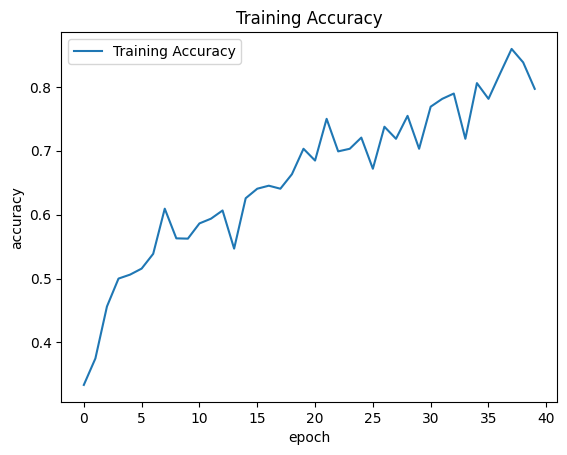

In [11]:
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()